In [ ]:
install.packages("cli")
install.packages("dplyr")
install.packages("SeuratObject")
install.packages("Seurat")

In [ ]:
if (!requireNamespace("remotes", quietly = TRUE)) install.packages("remotes")
remotes::install_github("samuel-marsh/scCustomize")

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("UCell")

In [1]:
library(SeuratObject)
library(Seurat)
library(dplyr)
library(cli)

Loading required package: sp

‘SeuratObject’ was built under R 4.4.1 but the current version is
4.4.2; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
library(Matrix)

# Download RDS files: "scrna_yBM_oBM_adt_hto.rds" from zenodo

In [4]:
bm_sommarin = readRDS("./scrna_yBM_oBM_adt_hto.rds")

## Figure S11A

In [6]:
Idents(object = bm_sommarin) <- "clust_names"

In [7]:
library(scCustomize)

scCustomize v3.0.1
If you find the scCustomize useful please cite.
See 'samuel-marsh.github.io/scCustomize/articles/FAQ.html' for citation info.



In [8]:
library(ggplot2)

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


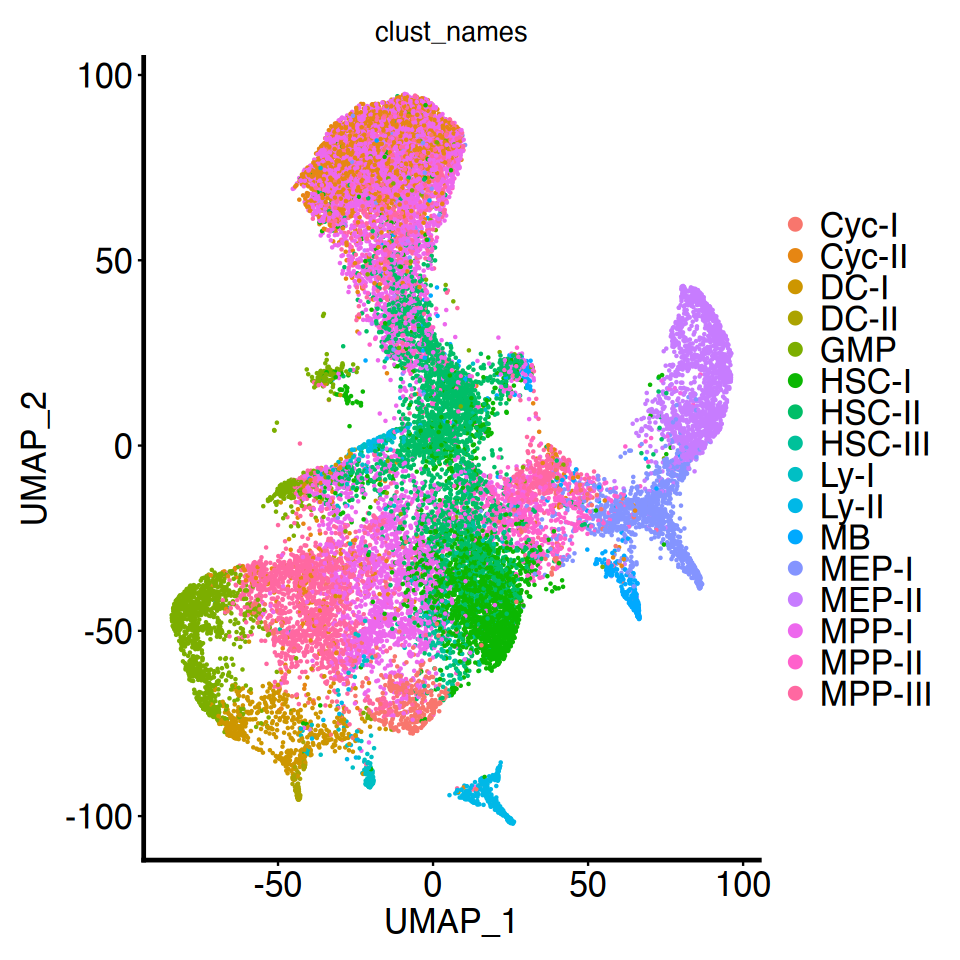

In [9]:
p<- DimPlot(bm_sommarin, reduction = "umap", group.by = 'clust_names')+
theme(axis.text.x = element_text(size = 20, color= 'black', face='bold'),  # Increase font size of x-axis labels
    axis.text.y = element_text(size = 20, color='black',face='bold'),
    axis.title = element_text(size= 20, color='black',face = "bold"),
    legend.text = element_text(size= 20, color='black',face = "bold"),
    legend.title = element_text(size= 20, color='black',face = "bold"),
    panel.background = element_rect(fill = "white"),  # Set white background and black border
    panel.grid.minor = element_blank(),  # Remove minor gridlines
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_blank(),
    axis.line = element_line(color = "black", size = 1.0),  # Increased thickness of axis lines
  )
#ggsave(paste0(outbase, 'Sommarin_combined.pdf'), p, dpi = 300)
p

## Figure 6A

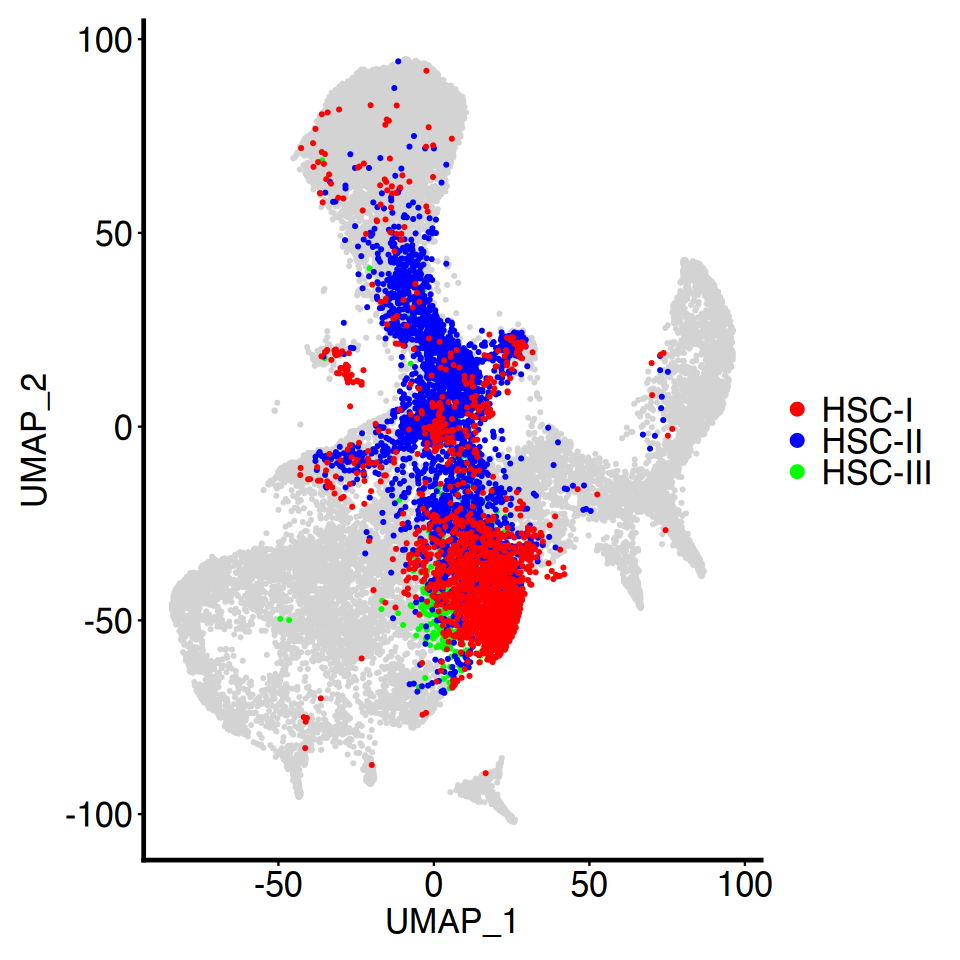

In [12]:
p<- Cluster_Highlight_Plot(bm_sommarin, cluster_name = c("HSC-I", "HSC-II", "HSC-III"), highlight_color = c("red", "blue", "green"),
background_color = "lightgray",  pt.size = 0.5)+
theme(axis.text.x = element_text(size = 20, color= 'black', face='bold'),  # Increase font size of x-axis labels
    axis.text.y = element_text(size = 20, color='black',face='bold'),
    axis.title = element_text(size= 20, color='black',face = "bold"),
    legend.text = element_text(size= 20, color='black',face = "bold"),
    legend.title = element_text(size= 20, color='black',face = "bold"),
    panel.background = element_rect(fill = "white"),  # Set white background and black border
    panel.grid.minor = element_blank(),  # Remove minor gridlines
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_blank(),
    axis.line = element_line(color = "black", size = 1.0),  # Increased thickness of axis lines
  )
#ggsave(paste0(outbase, 'Sommarin_HSChighlight.pdf'), p, dpi = 300)
p

In [14]:
bm_sommarin_HSC <- bm_sommarin[, (bm_sommarin$clust_names == 'HSC-I'|bm_sommarin$clust_names == 'HSC-II'|bm_sommarin$clust_names == 'HSC-III') ]

In [15]:
DefaultAssay(bm_sommarin_HSC) <- "ADT"

Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Picking joint bandwidth of 0.128



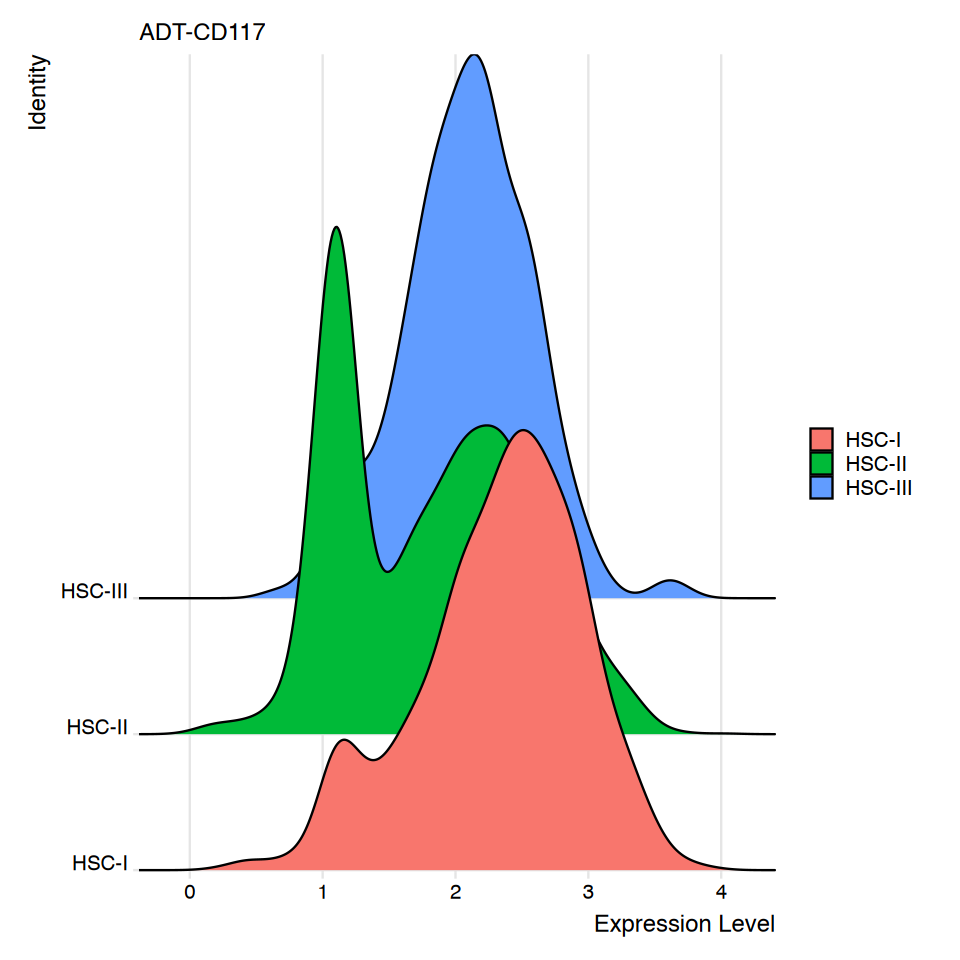

In [16]:
RidgePlot(object = bm_sommarin_HSC, feature = c("ADT-CD117"))

In [17]:
# Identify the cells with CD117 expression
cd117_expression <- FetchData(object = bm_sommarin_HSC, vars = c("ADT-CD117"))
cells_of_interest <- which(cd117_expression > 1.3)

In [18]:
# Create a new Seurat object with only the cells of interest
HSC_clean <- bm_sommarin_HSC[, cells_of_interest]

In [31]:
Idents(object = HSC_clean) <- "clust_names"

Picking joint bandwidth of 0.107



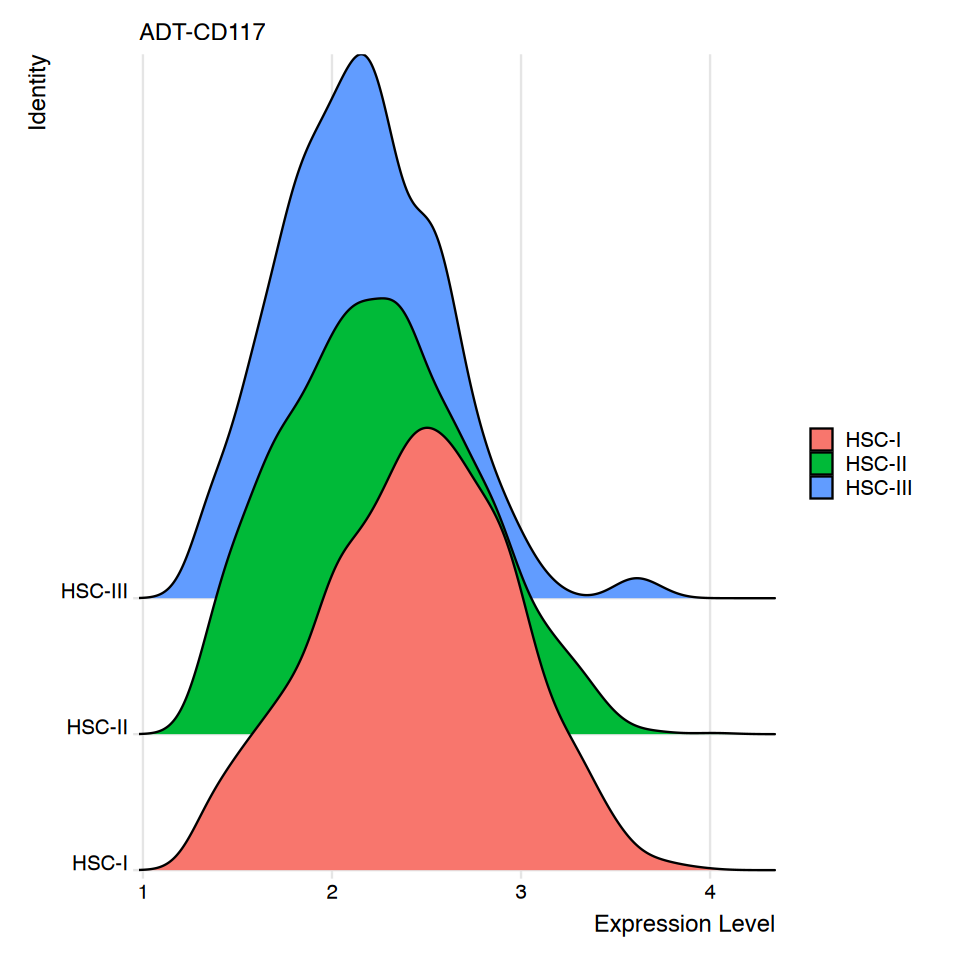

In [32]:
RidgePlot(object = HSC_clean, feature = c("ADT-CD117"))

## Figure 6B

In [20]:
# Create a vector with age labels corresponding to each sample name
sample_names <- colnames(HSC_clean)
age_labels <- ifelse(grepl("^ybm", sample_names), "young", "old")
HSC_clean$age <- age_labels

In [21]:
Idents(object = HSC_clean) <- "clust_names"

In [25]:
HSC_subsets <- c("HSC-I" = "red", "HSC-II" = "blue", "HSC-III" = "green")
age <- c("old" = "darkgrey", "young" = "darkorange") ##assign specific colors

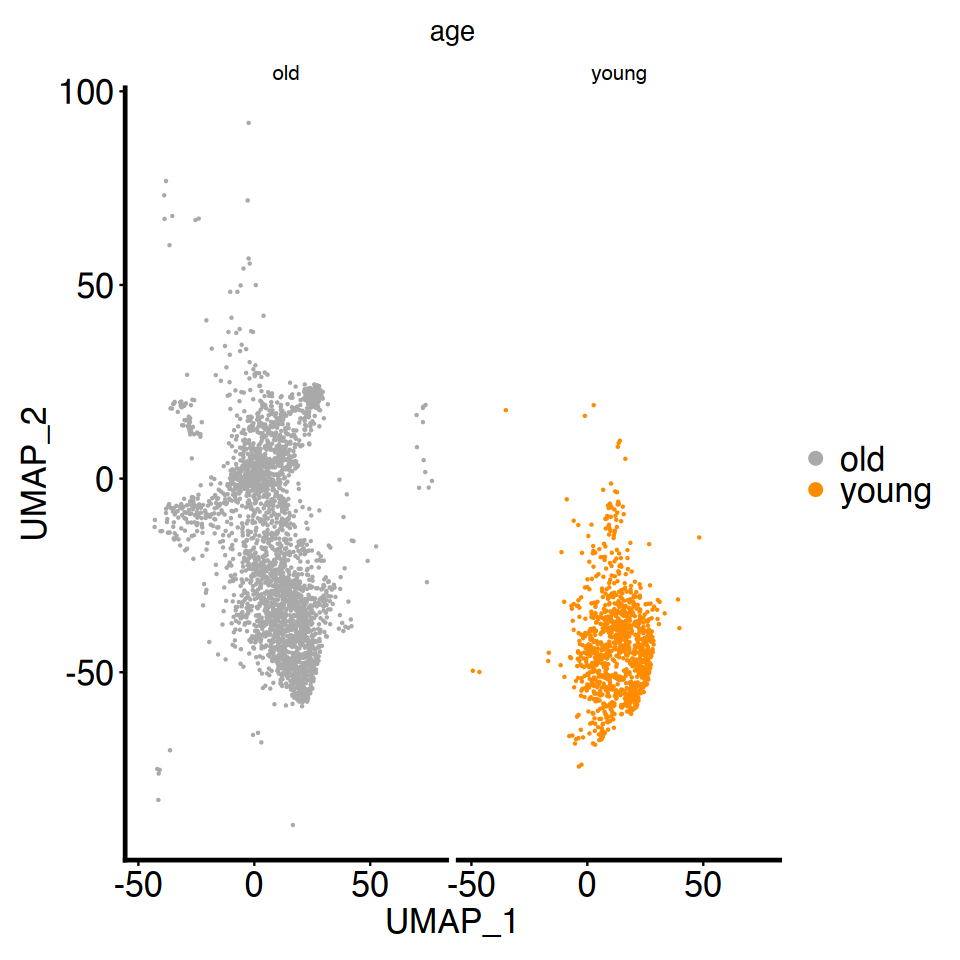

In [30]:
DimPlot(HSC_clean, reduction = "umap", group.by = 'age', split.by = 'age', pt.size = 0.05, repel = TRUE) +
    theme(
        axis.text.x = element_text(size = 20, color = 'black', face = 'bold'),
        axis.text.y = element_text(size = 20, color = 'black', face = 'bold'),
        axis.title = element_text(size = 20, color = 'black', face = "bold"),
        legend.text = element_text(size = 20, color = 'black', face = "bold"),
        legend.title = element_text(size = 20, color = 'black', face = "bold"),
        panel.background = element_rect(fill = "white"),
        panel.grid.minor = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.major.y = element_blank(),
        axis.line = element_line(color = "black", size = 1.0)
    ) + 
    scale_color_manual(values = c("young" = "darkorange", "old" = "darkgrey"))


## Figure 6C

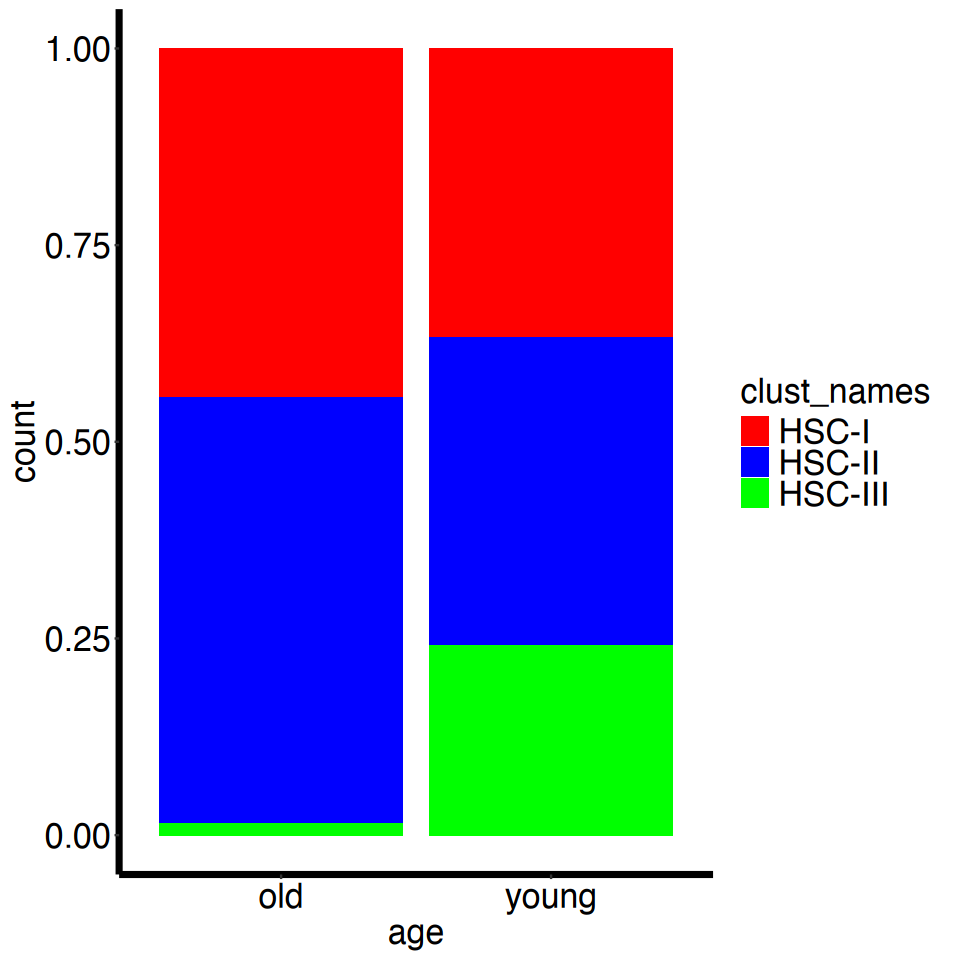

In [23]:
p<-ggplot(HSC_clean@meta.data, aes(age)) + geom_bar(aes(fill = clust_names), position='fill')+
scale_fill_manual(values = HSC_subsets) +  # Assign specific colors to the clusters
 theme(axis.text.x = element_text(size = 20, color= 'black', face='bold'),  # Increase font size of x-axis labels
    axis.text.y = element_text(size = 20, color='black',face='bold'),
    axis.title = element_text(size= 20, color='black',face = "bold"),
    legend.text = element_text(size= 20, color='black',face = "bold"),
    legend.title = element_text(size= 20, color='black',face = "bold"),
    panel.background = element_rect(fill = "white"),  # Set white background and no border
    panel.grid.minor = element_blank(),  # Remove minor gridlines
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_blank(),
    axis.line = element_line(color = "black", size = 1.5),  # Increased thickness of axis lines
    panel.grid = element_blank()# Remove background gridlines
  )

#ggsave(paste0(outbase, 'Sommarin_Age_HSCsubsets.pdf'), p, dpi = 300)
p

## Figure S11B

In [33]:
Idents(object = HSC_clean) <- "age"

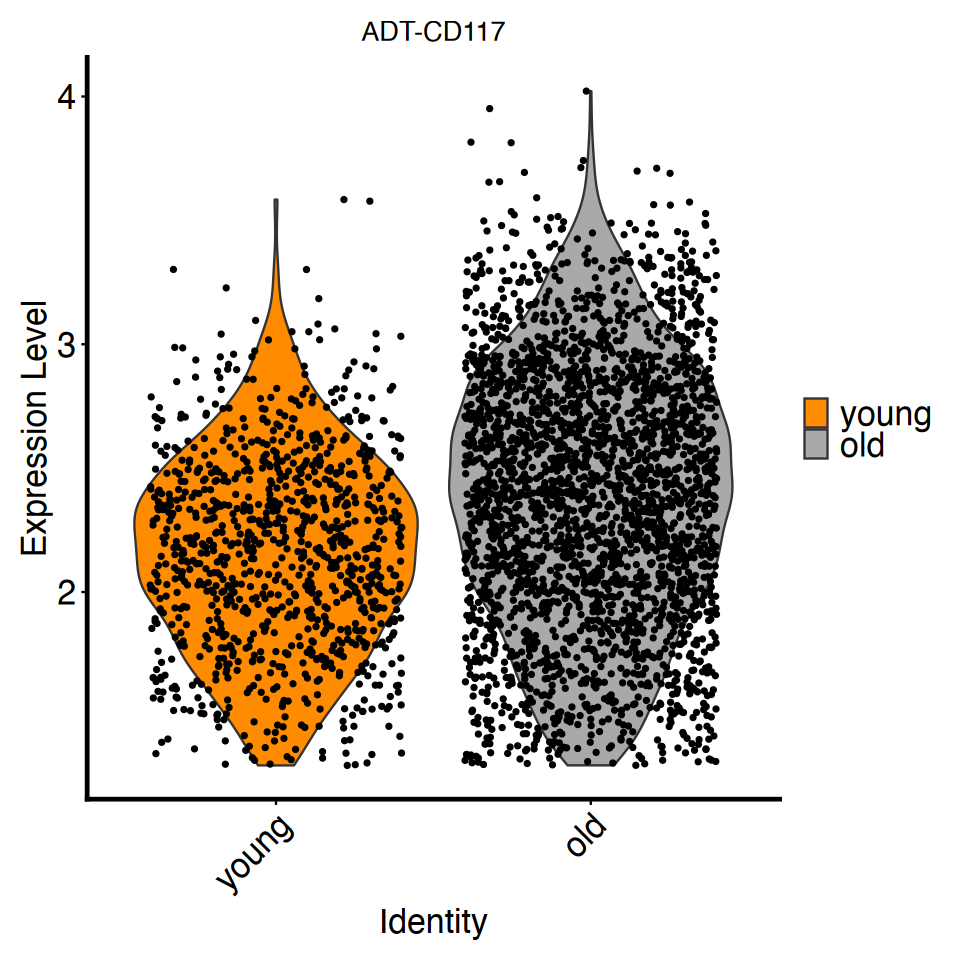

In [34]:
p<- VlnPlot(object = HSC_clean, feature = c("ADT-CD117"))+
scale_fill_manual(values = age) +  # Assign specific colors to the clusters
theme(axis.text.x = element_text(size = 20, color= 'black', face='bold'),  # Increase font size of x-axis labels
    axis.text.y = element_text(size = 20, color='black',face='bold'),
    axis.title = element_text(size= 20, color='black',face = "bold"),
    legend.text = element_text(size= 20, color='black',face = "bold"),
    legend.title = element_text(size= 20, color='black',face = "bold"),
    panel.background = element_rect(fill = "white"),  # Set white background and black border
    panel.grid.minor = element_blank(),  # Remove minor gridlines
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_blank(),
    axis.line = element_line(color = "black", size = 1.0),  # Increased thickness of axis lines
  )

#ggsave(paste0(outbase, 'Sommarin_HSC_ADT_CD117.pdf'), p, dpi = 300)
p

In [35]:
# subset the old and young samples based on the metadata "age"
old_samples <- HSC_clean[["age"]] == "old"
old <- HSC_clean[, old_samples]

young_samples <- HSC_clean[["age"]] == "young"
young <- HSC_clean[, young_samples]

In [36]:
# Extract the expression values for "ADT-CD117" from the old samples
cd117_old <- FetchData(object=old, vars= "ADT-CD117")
cd117_young <-FetchData(object=young, vars="ADT-CD117")

In [39]:
library(tibble)

In [40]:
df <- data.frame(cd117_old)
df <- rownames_to_column(df, var = "CellNames")
old_cd117<- df$ADT.CD117
old_cd117

[1] 2.377636 2.823075 1.328563 3.145254 2.068464 2.852894 2.153349 2.193244
   [9] 1.911253 2.041362 2.276288 2.888339 2.303870 2.760580 2.738384 2.449398
  [17] 2.751905 2.259125 2.221127 2.678659 2.119392 1.377693 2.341059 1.366701
  [25] 2.661206 2.518510 2.571600 2.927353 2.622853 2.045077 1.402336 3.375858
  [33] 2.225936 2.320356 1.966437 1.841684 2.450200 2.377377 2.457554 2.469676
  [41] 2.510833 2.803772 1.345296 1.997641 1.721964 2.971775 2.548923 2.125101
  [49] 2.339983 3.656140 2.349058 2.205695 1.884917 2.687500 2.136453 2.442758
  [57] 2.237958 2.049075 1.891836 1.548742 2.651978 2.267655 2.149112 1.624608
  [65] 2.404938 2.271800 2.002844 2.244734 2.917221 3.155377 2.986033 2.198679
  [73] 2.028587 1.672722 1.321762 2.314149 2.261050 2.352232 2.183634 1.581801
  [81] 2.387577 2.348300 2.456448 2.601368 1.949521 1.972605 2.276843 2.347562
  [89] 2.310595 2.119241 3.299285 1.670046 2.301529 3.467068 2.771417 2.893137
  [97] 2.357838 2.503181 2.421176 2.446080 2.177076 3.063721 2.660108 2.351113
 [105] 2.537672 1.387464 2.040223 2.896195 2.601098 2.548876 3.117411 2.734125
 [113] 3.256742 2.693671 2.972967 2.717330 2.884573 1.835828 1.706288 2.356108
 [121] 1.667110 2.225167 2.066110 2.173433 2.261979 2.622444 2.458403 2.228271
 [129] 2.722992 2.259368 2.785883 2.957974 2.843532 1.998065 2.458728 2.504340
 [137] 2.103080 2.515649 2.648914 2.597604 2.959932 3.084692 2.740193 2.438372
 [145] 2.114119 2.809063 1.823926 2.631732 2.232081 2.377554 2.925914 1.666622
 [153] 1.907368 2.664430 2.404625 2.388878 2.841889 1.503397 2.625424 1.838393
 [161] 2.022040 2.424233 3.282530 2.040326 2.429715 1.817227 1.746022 2.269667
 [169] 2.945724 2.845596 2.939725 2.557098 2.399493 2.961056 2.614533 2.428985
 [177] 3.154347 2.549697 3.741676 1.662442 2.179847 2.367979 2.443075 2.947077
 [185] 2.281160 2.470833 2.557394 1.352744 2.858016 2.908983 1.433391 1.908356
 [193] 2.264342 1.704362 1.848569 1.783259 1.445810 2.620653 3.256988 3.195650
 [201] 2.267340 2.114293 1.967189 2.733088 2.524815 2.674234 2.096468 1.760015
 [209] 2.054019 2.579181 2.677330 2.377899 1.799002 2.580832 3.018525 2.708985
 [217] 3.228834 2.727999 2.141796 2.152434 1.473152 1.740824 1.683879 1.727879
 [225] 3.515580 2.107976 1.372591 2.390418 2.909686 1.733254 2.892390 1.931979
 [233] 2.203385 2.358327 1.938702 1.977963 2.744510 2.857542 2.654933 2.188410
 [241] 3.040012 2.726629 2.640084 2.216479 2.242271 2.870732 3.065580 1.831283
 [249] 1.651661 2.889373 1.883435 2.301134 1.908276 2.410076 2.743021 2.684996
 [257] 2.205237 2.005063 1.885429 2.780920 3.217600 2.716858 1.493323 2.369563
 [265] 2.698349 2.518574 2.763540 1.988491 1.691579 2.494966 2.866596 2.774267
 [273] 3.028664 1.699171 2.584698 1.975510 2.794874 2.617597 2.408128 1.994362
 [281] 3.179841 2.303976 1.950628 2.524206 2.051623 2.886874 2.865066 2.111216
 [289] 2.562204 2.596651 2.015038 2.735488 2.871853 1.485989 2.841628 2.035116
 [297] 2.411794 3.155002 2.893137 1.740058 2.602046 1.679567 2.052934 2.389670
 [305] 2.121318 2.032378 2.246014 2.993164 3.080268 2.287522 2.156942 2.343566
 [313] 2.259106 1.458238 2.406273 2.602022 1.541285 2.229258 1.939503 2.016333
 [321] 1.612910 2.971893 1.747058 2.654230 2.028777 2.533979 3.124911 2.721835
 [329] 2.920194 2.963162 2.926922 2.951147 2.682352 2.416231 2.279303 2.730413
 [337] 2.768659 3.044249 2.416675 2.476754 2.812902 2.670283 2.530573 2.701615
 [345] 2.102755 1.990090 2.871273 1.627793 2.477012 2.199618 2.608974 2.805032
 [353] 1.637627 1.419871 3.260801 2.634052 3.002090 3.693672 2.702837 2.034238
 [361] 1.999879 2.108156 2.575152 2.562537 2.475512 2.125161 2.781042 3.082736
 [369] 2.889098 1.541742 3.189383 2.576751 2.556856 2.061695 2.961018 2.935937
 [377] 2.829515 2.910831 2.642531 3.210023 1.329810 2.352392 2.026619 1.873419
 [385] 2.581501 2.458030 1.890401 2.355340 2.289362 1.512445 3.072729 2.896613
 [393] 2.066229 2.145287 2.312103 2.451352 2.209074 2.811514 2.678406 1.436742
 [401] 1.433025 1.741167 2.868036 3.049570 2.883895 1

In [41]:
df1 <- data.frame(cd117_young)
df1 <- rownames_to_column(df1, var = "CellNames")
young_cd117<- df1$ADT.CD117
young_cd117

[1] 1.478249 1.936850 2.165846 1.819393 1.654467 2.479435 2.043884 2.629393
   [9] 2.382455 1.860074 2.585107 2.068574 2.475819 1.453426 2.290017 1.598971
  [17] 2.623798 1.300160 2.097352 2.196719 2.124379 1.973368 2.030216 2.288251
  [25] 1.596118 3.041055 2.229229 1.931228 2.583261 2.346262 2.069576 2.526239
  [33] 2.373153 2.262293 1.802163 1.847573 1.527438 1.619342 2.446233 2.248202
  [41] 2.203443 1.756658 2.262984 1.843900 2.362198 1.420621 2.531191 2.040515
  [49] 1.892520 1.784672 2.138854 1.507171 2.149978 1.508266 2.380048 2.488658
  [57] 2.184203 1.566991 2.006950 1.749646 1.595980 2.003107 1.994145 2.145039
  [65] 2.141520 2.191581 1.451204 2.555854 2.293392 1.456111 1.304996 2.031806
  [73] 2.097115 2.497481 2.255275 2.068167 2.100586 1.710668 2.345770 2.381070
  [81] 2.352465 2.155423 1.545763 2.307467 1.783068 2.059130 2.345940 1.997964
  [89] 2.317236 2.294011 2.321744 2.186902 2.234312 1.484914 1.398897 1.817629
  [97] 2.093623 1.674223 1.661905 2.145534 2.043281 1.992557 1.957983 2.084129
 [105] 1.839328 1.970466 1.774975 2.744285 1.743262 2.612749 2.413856 2.538824
 [113] 1.825517 1.564057 2.337885 2.023292 2.771887 1.550535 1.786385 1.697184
 [121] 1.910812 2.416309 2.349715 2.303258 2.331710 2.352464 2.195237 2.135498
 [129] 1.672089 2.449369 2.551775 2.365352 2.356145 2.047769 1.922366 2.012579
 [137] 1.683888 1.997665 2.404798 2.332311 2.261607 2.717443 1.335501 1.305550
 [145] 1.698720 1.808844 1.950179 1.537949 1.887386 2.702128 1.393525 1.894911
 [153] 1.718598 1.638515 1.828184 1.926214 1.331019 2.613512 1.593767 2.562631
 [161] 3.577530 1.963553 1.770029 2.023950 2.288204 2.025782 1.716110 2.073179
 [169] 2.355566 2.018940 2.859185 1.627726 1.521209 2.342259 1.687132 1.946514
 [177] 2.453927 1.894193 1.868516 1.731363 1.848638 1.748879 2.196203 2.706280
 [185] 2.306500 1.963280 1.783471 1.928950 1.899940 2.011662 2.186661 1.880272
 [193] 1.674947 1.754903 2.235170 2.438840 2.059094 1.935669 1.931568 1.647747
 [201] 2.367276 1.880967 2.045143 2.502191 2.366516 1.700014 1.904190 1.647074
 [209] 1.458108 2.456948 2.082139 2.783605 1.668575 2.120222 1.726284 1.781317
 [217] 2.413780 1.435194 1.793984 2.282134 1.984915 1.607342 1.784453 2.628067
 [225] 1.922759 1.789522 1.872934 1.699282 1.533918 2.081981 1.831367 1.653254
 [233] 1.930004 2.360123 1.842408 2.021032 2.487805 1.998392 1.347711 1.567253
 [241] 2.333820 2.415181 2.529703 2.690233 1.773725 2.377772 2.219178 1.903310
 [249] 1.999035 2.022138 2.198538 2.167546 2.353637 2.494451 1.710966 2.041249
 [257] 2.100341 2.224174 2.137916 2.463723 2.003727 1.612158 1.835572 1.862470
 [265] 2.107172 2.134222 1.993155 1.753254 2.411014 2.352559 2.095198 1.744742
 [273] 1.595221 1.769956 1.896137 2.520076 2.415221 2.099637 2.201639 2.386976
 [281] 2.126849 2.274412 2.283437 2.101242 3.301548 1.983435 2.287680 1.914387
 [289] 1.538691 1.609086 1.705017 1.496325 1.568791 2.441772 1.909518 1.675883
 [297] 2.448003 1.532192 1.880696 1.528015 1.872295 2.469798 2.395076 1.958295
 [305] 2.619684 2.357862 1.963051 1.972019 1.787082 2.120883 2.136090 2.238154
 [313] 1.739506 1.355979 1.802679 2.340280 2.478942 2.025109 2.245800 1.641264
 [321] 2.551810 2.981454 1.433090 1.377402 1.310292 2.179455 2.666011 1.608770
 [329] 2.699615 2.613253 2.263768 1.812048 2.025343 2.634980 2.309867 2.094079
 [337] 2.319097 2.594856 1.848692 2.697976 2.702717 1.885616 2.299334 2.349494
 [345] 2.569889 2.368457 2.394158 2.383931 2.259987 1.837447 1.843192 2.815466
 [353] 2.582547 2.509467 2.733202 2.070765 2.260862 2.000805 1.920839 2.078471
 [361] 2.201067 1.773382 2.202084 2.383088 2.179069 1.997135 2.211978 2.500202
 [369] 2.191195 2.346740 1.485185 1.745729 1.992100 2.651283 2.919113 2.339941
 [377] 1.708868 2.007280 2.033091 2.110105 2.496549 1.970955 2.221392 2.707531
 [385] 2.051075 2.194881 2.419686 2.274790 1.544130 2.721600 1.797942 2.029286
 [393] 2.669174 2.318537 1.675401 2.485459 2.119867 2.001445 2.806103 2.179898
 [401] 1.892233 2.015665 1.403469 2.163407 2.459740 2

In [42]:
# run Mann-whitney 
result <- wilcox.test(old_cd117, young_cd117)
result


	Wilcoxon rank sum test with continuity correction

data:  old_cd117 and young_cd117
W = 1793173, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


## Mouse Kitlo signature enrichment

In [61]:
# Normalize RNA data,
DefaultAssay(HSC_clean) <- "RNA"
HSC_clean <- NormalizeData(HSC_clean, normalization.method = "LogNormalize",
                          scale.factor = 10000, margin=1, verbose = TRUE)

Warning message:
“The `slot` argument of `SetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


In [43]:
library(tidyverse)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [44]:
genes_names <- "Xist
Rap1b
Zeb2
Mki67
Diaph3
Top2a
Hmgb2
Pbx1
Rad51b
Plxdc2
Atad2
Cenpp
Plcb1
Hspa5
Pola1
Pdcd4
Pf4
Psd3
Knl1
Smc4
Mef2c
Smc2
Cep128
Prkca
Dlg2
Lmnb1
Dek
Lims1
Nucks1
Ezh2
Hist1h2ap
Rab27b
Asap1
Rrm1
Dtl
H2afz
Tsc22d2
Kif11
Vcl
Itga2b
Vwf
Kif15
Prim2
Sik2
Mms22l
Kif20b
Fli1
Hist1h1b
Etf1
Sik3
Ncam2
Smchd1
Gm47283
Atad5
Cit
Cenpe
Cntln
AU020206
Hist1h2ae
Purb
Nol4l
Cks2
Klf9
Rabgap1l
Zbtb11
Cbx5
Klf13
Klf6
Smarca5
Cenpf
Brip1
Dnmt1
Tmpo
Blm
Tgfb1
Elf1
Ncapg2
AI504432
Polq
Kpna1
Serpina3g
Nup153
Sfmbt1
Rad18
Rbbp8
Ncapd3
Calm1
Lockd
Topbp1
Ranbp2
Hjurp
Neil3
Spata5
Coro2a
Dgkd
Mgat5
Mapk1
Ctdspl
Hells
Kalrn
Pde5a
Ube2s
Pds5a
Gnas
Ckap5
Brca1
Adgrl1
C1galt1
Bmp2k
Tpx2
Srgap2
Suz12
Mid1
Incenp
Dut
Tra2b
Pcna
Xpo1
Tiparp
Slc9a9
Sntb1
Ctnnal1
Tmsb4x
Hdgf
Spidr
Kif2a
Ckap2l
Ccnl1
Yaf2
Usp24
Anln
Mapre1
Nasp
Igf2bp2
Plek
Hspa4
Fyn
Mmp16
Ube2k
Gucy1a1
Ifrd1
Oxct1
Btg2
Nap1l1
Rlim
Tuba1b
Ncapd2
Pkp4
Mast2
Nktr
Chd1
Nptn
Rab5a
Fkbp5
Kif23
Sla
11-Sep
Wdhd1
Ehd4
Mvb12b
Usp32
Ccnt1
Zwilch
Tubb5
Kif4
Lig1
Mapk6
Stag1
P3h2
Depdc1b
Mis18bp1
Clic4
Brca2
Arhgap10
Odc1
Tyms
Uhrf1
Stmn1
Rangap1
Kif24
Kif18a
Baz1b
Hsp90b1
Hnrnpd
Cenpk
Rad21
Klf2
E2f8
Pdgfc
Atl2
Plk4
Anp32e
Prc1
Cenph
Actn4
Pclaf
Adgrl2
Ski
Pole
Tsix
Alyref
Clspn
Klf4
Kif5b
F2r
Dyrk1a
Aspm
Ncoa3
Hipk2
Baz1a
Ndc1
Zranb3
Slc24a3
Bard1
Azin1
Dynll1
Usp1
Kdm6a
Spag9
Lin54
Zfpm1
Hist1h1d
Phka2
Hipk1
Slc7a1
Nusap1
Slbp
Spc24
Ppp2ca
Slc14a1
Mapkapk2
Dbf4
Zgrf1
Arih1
Kntc1
Hspa8
Snrpd1
Hmgn2
Cep192
Pde10a
H2afv
Cdca2
Stil
Mfsd2b
Ctcf
Srsf3
Myom1
Nr4a1
Ran
Tipin
Ndc80
E2f7
Ncapg
Bub1b"

In [45]:
genes_names <- paste(genes_names, collapse = ", ")

In [46]:
# Convert the vertical list to a horizontal list separated by commas
horizontal_genes <- gsub("\n", ", ", genes_names)

In [47]:
gene_list <- strsplit(horizontal_genes, ", ")[[1]]
gene_list

[1] "Xist"      "Rap1b"     "Zeb2"      "Mki67"     "Diaph3"    "Top2a"    
  [7] "Hmgb2"     "Pbx1"      "Rad51b"    "Plxdc2"    "Atad2"     "Cenpp"    
 [13] "Plcb1"     "Hspa5"     "Pola1"     "Pdcd4"     "Pf4"       "Psd3"     
 [19] "Knl1"      "Smc4"      "Mef2c"     "Smc2"      "Cep128"    "Prkca"    
 [25] "Dlg2"      "Lmnb1"     "Dek"       "Lims1"     "Nucks1"    "Ezh2"     
 [31] "Hist1h2ap" "Rab27b"    "Asap1"     "Rrm1"      "Dtl"       "H2afz"    
 [37] "Tsc22d2"   "Kif11"     "Vcl"       "Itga2b"    "Vwf"       "Kif15"    
 [43] "Prim2"     "Sik2"      "Mms22l"    "Kif20b"    "Fli1"      "Hist1h1b" 
 [49] "Etf1"      "Sik3"      "Ncam2"     "Smchd1"    "Gm47283"   "Atad5"    
 [55] "Cit"       "Cenpe"     "Cntln"     "AU020206"  "Hist1h2ae" "Purb"     
 [61] "Nol4l"     "Cks2"      "Klf9"      "Rabgap1l"  "Zbtb11"    "Cbx5"     
 [67] "Klf13"     "Klf6"      "Smarca5"   "Cenpf"     "Brip1"     "Dnmt1"    
 [73] "Tmpo"      "Blm"       "Tgfb1"     "Elf1"      "Ncapg2"    "AI504432" 
 [79] "Polq"      "Kpna1"     "Serpina3g" "Nup153"    "Sfmbt1"    "Rad18"    
 [85] "Rbbp8"     "Ncapd3"    "Calm1"     "Lockd"     "Topbp1"    "Ranbp2"   
 [91] "Hjurp"     "Neil3"     "Spata5"    "Coro2a"    "Dgkd"      "Mgat5"    
 [97] "Mapk1"     "Ctdspl"    "Hells"     "Kalrn"     "Pde5a"     "Ube2s"    
[103] "Pds5a"     "Gnas"      "Ckap5"     "Brca1"     "Adgrl1"    "C1galt1"  
[109] "Bmp2k"     "Tpx2"      "Srgap2"    "Suz12"     "Mid1"      "Incenp"   
[115] "Dut"       "Tra2b"     "Pcna"      "Xpo1"      "Tiparp"    "Slc9a9"   
[121] "Sntb1"     "Ctnnal1"   "Tmsb4x"    "Hdgf"      "Spidr"     "Kif2a"    
[127] "Ckap2l"    "Ccnl1"     "Yaf2"      "Usp24"     "Anln"      "Mapre1"   
[133] "Nasp"      "Igf2bp2"   "Plek"      "Hspa4"     "Fyn"       "Mmp16"    
[139] "Ube2k"     "Gucy1a1"   "Ifrd1"     "Oxct1"     "Btg2"      "Nap1l1"   
[145] "Rlim"      "Tuba1b"    "Ncapd2"    "Pkp4"      "Mast2"     "Nktr"     
[151] "Chd1"      "Nptn"      "Rab5a"     "Fkbp5"     "Kif23"     "Sla"      
[157] "11-Sep"    "Wdhd1"     "Ehd4"      "Mvb12b"    "Usp32"     "Ccnt1"    
[163] "Zwilch"    "Tubb5"     "Kif4"      "Lig1"      "Mapk6"     "Stag1"    
[169] "P3h2"      "Depdc1b"   "Mis18bp1"  "Clic4"     "Brca2"     "Arhgap10" 
[175] "Odc1"      "Tyms"      "Uhrf1"     "Stmn1"     "Rangap1"   "Kif24"    
[181] "Kif18a"    "Baz1b"     "Hsp90b1"   "Hnrnpd"    "Cenpk"     "Rad21"    
[187] "Klf2"      "E2f8"      "Pdgfc"     "Atl2"      "Plk4"      "Anp32e"   
[193] "Prc1"      "Cenph"     "Actn4"     "Pclaf"     "Adgrl2"    "Ski"      
[199] "Pole"      "Tsix"      "Alyref"    "Clspn"     "Klf4"      "Kif5b"    
[205] "F2r"       "Dyrk1a"    "Aspm"      "Ncoa3"     "Hipk2"     "Baz1a"    
[211] "Ndc1"      "Zranb3"    "Slc24a3"   "Bard1"     "Azin1"     "Dynll1"   
[217] "Usp1"      "Kdm6a"     "Spag9"     "Lin54"     "Zfpm1"     "Hist1h1d" 
[223] "Phka2"     "Hipk1"     "Slc7a1"    "Nusap1"    "Slbp"      "Spc24"    
[229] "Ppp2ca"    "Slc14a1"   "Mapkapk2"  "Dbf4"      "Zgrf1"     "Arih1"    
[235] "Kntc1"     "Hspa8"     "Snrpd1"    "Hmgn2"     "Cep192"    "Pde10a"   
[241] "H2afv"     "Cdca2"     "Stil"      "Mfsd2b"    "Ctcf"      "Srsf3"    
[247] "Myom1"     "Nr4a1"     "Ran"       "Tipin"     "Ndc80"     "E2f7"     
[253] "Ncapg"     "Bub1b"

In [48]:
horizontal_genes

[1] "Xist, Rap1b, Zeb2, Mki67, Diaph3, Top2a, Hmgb2, Pbx1, Rad51b, Plxdc2, Atad2, Cenpp, Plcb1, Hspa5, Pola1, Pdcd4, Pf4, Psd3, Knl1, Smc4, Mef2c, Smc2, Cep128, Prkca, Dlg2, Lmnb1, Dek, Lims1, Nucks1, Ezh2, Hist1h2ap, Rab27b, Asap1, Rrm1, Dtl, H2afz, Tsc22d2, Kif11, Vcl, Itga2b, Vwf, Kif15, Prim2, Sik2, Mms22l, Kif20b, Fli1, Hist1h1b, Etf1, Sik3, Ncam2, Smchd1, Gm47283, Atad5, Cit, Cenpe, Cntln, AU020206, Hist1h2ae, Purb, Nol4l, Cks2, Klf9, Rabgap1l, Zbtb11, Cbx5, Klf13, Klf6, Smarca5, Cenpf, Brip1, Dnmt1, Tmpo, Blm, Tgfb1, Elf1, Ncapg2, AI504432, Polq, Kpna1, Serpina3g, Nup153, Sfmbt1, Rad18, Rbbp8, Ncapd3, Calm1, Lockd, Topbp1, Ranbp2, Hjurp, Neil3, Spata5, Coro2a, Dgkd, Mgat5, Mapk1, Ctdspl, Hells, Kalrn, Pde5a, Ube2s, Pds5a, Gnas, Ckap5, Brca1, Adgrl1, C1galt1, Bmp2k, Tpx2, Srgap2, Suz12, Mid1, Incenp, Dut, Tra2b, Pcna, Xpo1, Tiparp, Slc9a9, Sntb1, Ctnnal1, Tmsb4x, Hdgf, Spidr, Kif2a, Ckap2l, Ccnl1, Yaf2, Usp24, Anln, Mapre1, Nasp, Igf2bp2, Plek, Hspa4, Fyn, Mmp16, Ube2k, Gucy1a1, Ifrd1, Oxct1, Btg2, Nap1l1, Rlim, Tuba1b, Ncapd2, Pkp4, Mast2, Nktr, Chd1, Nptn, Rab5a, Fkbp5, Kif23, Sla, 11-Sep, Wdhd1, Ehd4, Mvb12b, Usp32, Ccnt1, Zwilch, Tubb5, Kif4, Lig1, Mapk6, Stag1, P3h2, Depdc1b, Mis18bp1, Clic4, Brca2, Arhgap10, Odc1, Tyms, Uhrf1, Stmn1, Rangap1, Kif24, Kif18a, Baz1b, Hsp90b1, Hnrnpd, Cenpk, Rad21, Klf2, E2f8, Pdgfc, Atl2, Plk4, Anp32e, Prc1, Cenph, Actn4, Pclaf, Adgrl2, Ski, Pole, Tsix, Alyref, Clspn, Klf4, Kif5b, F2r, Dyrk1a, Aspm, Ncoa3, Hipk2, Baz1a, Ndc1, Zranb3, Slc24a3, Bard1, Azin1, Dynll1, Usp1, Kdm6a, Spag9, Lin54, Zfpm1, Hist1h1d, Phka2, Hipk1, Slc7a1, Nusap1, Slbp, Spc24, Ppp2ca, Slc14a1, Mapkapk2, Dbf4, Zgrf1, Arih1, Kntc1, Hspa8, Snrpd1, Hmgn2, Cep192, Pde10a, H2afv, Cdca2, Stil, Mfsd2b, Ctcf, Srsf3, Myom1, Nr4a1, Ran, Tipin, Ndc80, E2f7, Ncapg, Bub1b"

In [50]:
library(biomaRt)

In [51]:
human <- useMart(biomart = "ensembl", 
                   dataset = "hsapiens_gene_ensembl", 
                   host = "https://www.ensembl.org")

mouse <- useMart(biomart = "ensembl", 
                   dataset = "mmusculus_gene_ensembl", 
                   host = "https://www.ensembl.org")

In [52]:
mouse <- useMart( "ensembl", dataset = "mmusculus_gene_ensembl")
human <- useMart( "ensembl", dataset = "hsapiens_gene_ensembl")

In [53]:
mouse <- useMart( "ensembl", dataset = "mmusculus_gene_ensembl")

In [54]:
mouse_human_genes = read.csv("http://www.informatics.jax.org/downloads/reports/HOM_MouseHumanSequence.rpt",sep="\t")

In [55]:
convert_mouse_to_human <- function(gene_list){

  output = c()

  for(gene in gene_list){
    class_key = (mouse_human_genes %>% filter(Symbol == gene & Common.Organism.Name=="mouse, laboratory"))[['DB.Class.Key']]
    if(!identical(class_key, integer(0)) ){
      human_genes = (mouse_human_genes %>% filter(DB.Class.Key == class_key & Common.Organism.Name=="human"))[,"Symbol"]
      for(human_gene in human_genes){
        output = append(output,human_gene)
      }
    }
  }

  return (output)
}

In [56]:
human_genes <- convert_mouse_to_human(gene_list)

In [57]:
signatures <- list(kitlo = c(human_genes))

In [64]:
DefaultAssay(HSC_clean) <- "RNA"

In [65]:
available_gene_names <- rownames(HSC_clean)

In [66]:
available_gene_names

[1] "A1BG"             "A1BG-AS1"         "A1CF"            
    [4] "A2M"              "A2M-AS1"          "A2ML1"           
    [7] "A2ML1-AS1"        "A2ML1-AS2"        "A3GALT2"         
   [10] "A4GALT"           "A4GNT"            "AAAS"            
   [13] "AACS"             "AADAC"            "AADACL2"         
   [16] "AADACL2-AS1"      "AADACL3"          "AADACL4"         
   [19] "AADAT"            "AAED1"            "AAGAB"           
   [22] "AAK1"             "AAMDC"            "AAMP"            
   [25] "AANAT"            "AAR2"             "AARD"            
   [28] "AARS"             "AARS2"            "AARSD1"          
   [31] "AASDH"            "AASDHPPT"         "AASS"            
   [34] "AATBC"            "AATF"             "AATK"            
   [37] "AB015752.1"       "ABALON"           "ABAT"            
   [40] "ABCA1"            "ABCA10"           "ABCA12"          
   [43] "ABCA13"           "ABCA2"            "ABCA3"           
   [46] "ABCA4"            "ABCA5"            "ABCA6"           
   [49] "ABCA7"            "ABCA8"            "ABCA9"           
   [52] "ABCA9-AS1"        "ABCB1"            "ABCB10"          
   [55] "ABCB11"           "ABCB4"            "ABCB5"           
   [58] "ABCB6"            "ABCB7"            "ABCB8"           
   [61] "ABCB9"            "ABCC1"            "ABCC10"          
   [64] "ABCC11"           "ABCC12"           "ABCC2"           
   [67] "ABCC3"            "ABCC4"            "ABCC5"           
   [70] "ABCC5-AS1"        "ABCC6"            "ABCC8"           
   [73] "ABCC9"            "ABCD1"            "ABCD2"           
   [76] "ABCD3"            "ABCD4"            "ABCE1"           
   [79] "ABCF1"            "ABCF2-1"          "ABCF2-2"         
   [82] "ABCF3"            "ABCG1"            "ABCG2"           
   [85] "ABCG4"            "ABCG5"            "ABCG8"           
   [88] "ABHD1"            "ABHD10"           "ABHD11"          
   [91] "ABHD12"           "ABHD12B"          "ABHD13"          
   [94] "ABHD14A"          "ABHD14A-ACY1"     "ABHD14B"         
   [97] "ABHD15"           "ABHD15-AS1"       "ABHD16A"         
  [100] "ABHD16B"          "ABHD17A"          "ABHD17B"         
  [103] "ABHD17C"          "ABHD18"           "ABHD2"           
  [106] "ABHD3"            "ABHD4"            "ABHD5"           
  [109] "ABHD6"            "ABHD8"            "ABI1"            
  [112] "ABI2"             "ABI3"             "ABI3BP"          
  [115] "ABL1"             "ABL2"             "ABLIM1"          
  [118] "ABLIM2"           "ABLIM3"           "ABO"             
  [121] "ABR"              "ABRA"             "ABRACL"          
  [124] "ABRAXAS1"         "ABRAXAS2"         "ABT1"            
  [127] "ABTB1"            "ABTB2"            "AC000032.1"      
  [130] "AC000035.1"       "AC000036.1"       "AC000058.1"      
  [133] "AC000061.1"       "AC000067.1"       "AC000068.1"      
  [136] "AC000068.2"       "AC000068.3"       "AC000093.1"      
  [139] "AC000099.1"       "AC000123.1"       "AC000124.1"      
  [142] "AC000372.1"       "AC000403.1"       "AC001226.1"      
  [145] "AC001226.2"       "AC002056.2"       "AC002064.1"      
  [148] "AC002064.2"       "AC002066.1"       "AC002070.1"      
  [151] "AC002074.1"       "AC002076.1"       "AC002091.1"      
  [154] "AC002091.2"       "AC002094.2"       "AC002094.3"      
  [157] "AC002101.1"       "AC002115.1"       "AC002116.2"      
  [160] "AC002127.2"       "AC002128.2"       "AC002306.1"      
  [163] "AC002310.1"       "AC002310.2"       "AC002310.4"      
  [166] "AC002310.5"       "AC002347.1"       "AC002347.2"      
  [169] "AC002351.1"       "AC002368.1"       "AC002375.1"      
  [172] "AC002378.1"       "AC002383.1"       "AC002384.1"      
  [175] "AC002386.1"       "AC002398.1"       "AC002398.2"      
  [178] "AC002401.1"       "AC002401.2"       "AC002401.3"      
  [181] "AC002401.4"       "AC002428.1"       "AC002428.2"      
  [184] "AC002429.2"       "AC002451.1"

In [67]:
human_list <- human_genes %in% available_gene_names

In [68]:
human_list

[1]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[121]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[157]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[169]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[181]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[193]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[205]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[217]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[229]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[253]  TRUE  TRUE  TRUE  TRUE

In [69]:
library(UCell)

In [70]:
HSC_clean <- AddModuleScore_UCell(
                     HSC_clean, features= signatures, name= NULL)

Warning message:
“The following genes were not found and will be
                        imputed to exp=0:
* RAP1BL,HSP90B2P”


## Figure 6D

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


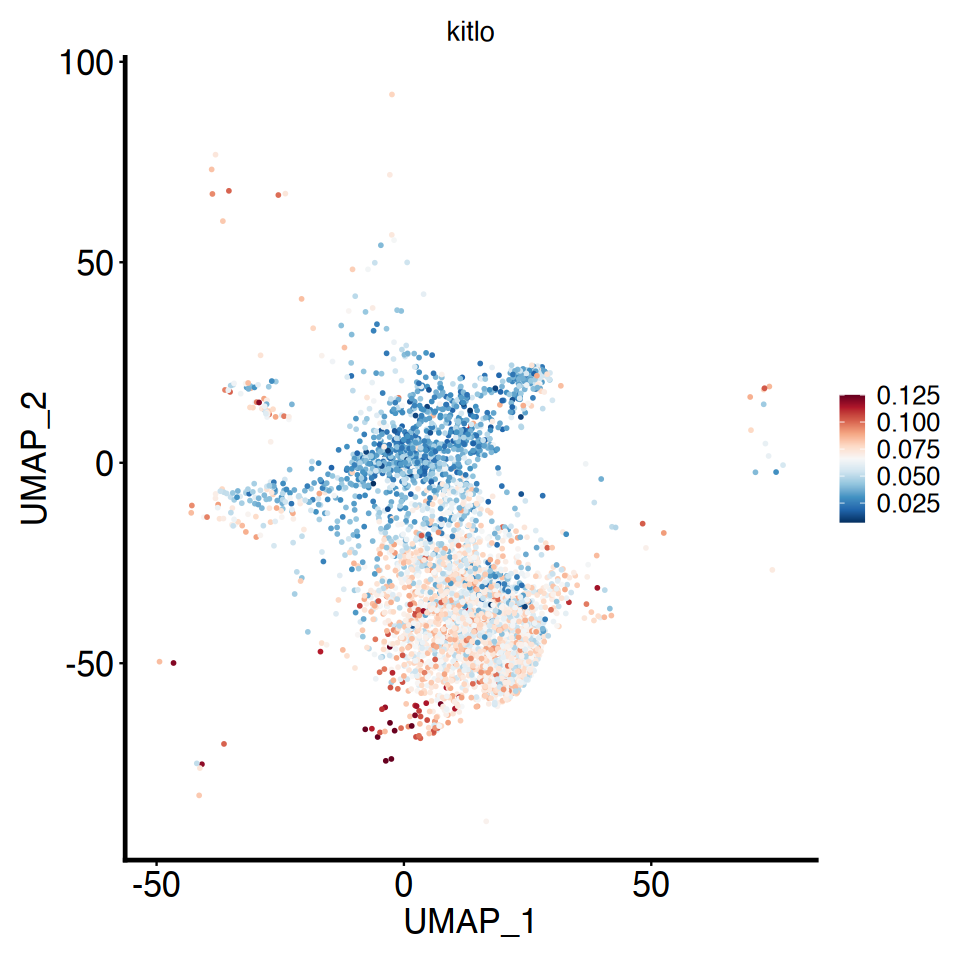

In [86]:
p<- FeaturePlot(HSC_clean, reduction = "umap", features = names(signatures),repel = TRUE,
  min.cutoff = 0, max.cutoff = 0.125)+
            scale_colour_gradientn(colours = rev(RColorBrewer::brewer.pal(n = 11, name = "RdBu")))+
theme(axis.text.x = element_text(size = 20, color= 'black', face='bold'),  # Increase font size of x-axis labels
    axis.text.y = element_text(size = 20, color='black',face='bold'),
    axis.title = element_text(size= 20, color='black',face = "bold"),
    legend.text = element_text(size= 15, color='black',face = "bold"),
    legend.title = element_text(size= 20, color='black',face = "bold"),
    panel.background = element_rect(fill = "white"),  # Set white background and black border
    panel.grid.minor = element_blank(),  # Remove minor gridlines
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_blank(),
    axis.line = element_line(color = "black", size = 1.0),  # Increased thickness of axis lines
  )

#ggsave(paste0(outbase, 'Sommarin_Kitlo_enrichment.pdf'), p, dpi = 300)
p

## Figure 6E

In [80]:
Idents(object = HSC_clean) <- "age"

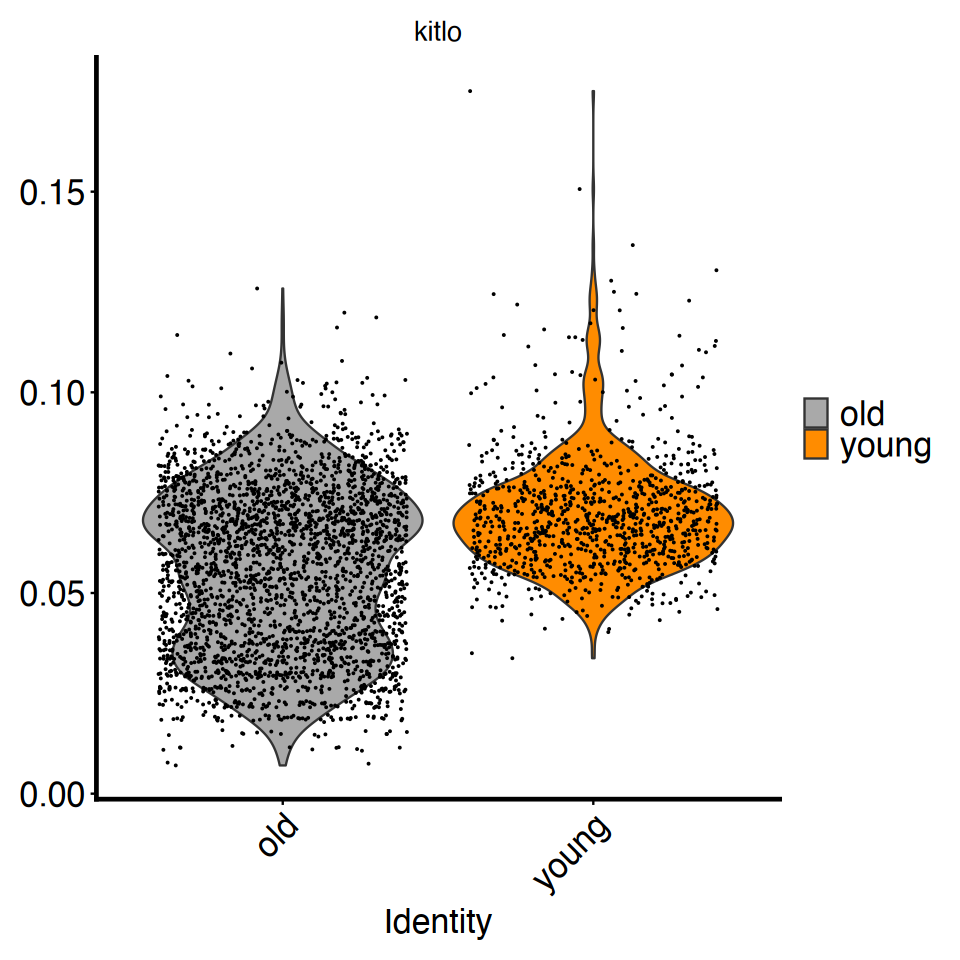

In [81]:
p<- VlnPlot(HSC_clean, c("kitlo"), group.by='age')+
scale_fill_manual(values = age) +  # Assign specific colors to the clusters
theme(axis.text.x = element_text(size = 20, color= 'black', face='bold'),  # Increase font size of x-axis labels
    axis.text.y = element_text(size = 20, color='black',face='bold'),
    axis.title = element_text(size= 20, color='black',face = "bold"),
    legend.text = element_text(size= 20, color='black',face = "bold"),
    legend.title = element_text(size= 20, color='black',face = "bold"),
    panel.background = element_rect(fill = "white"),  # Set white background and black border
    panel.grid.minor = element_blank(),  # Remove minor gridlines
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_blank(),
    axis.line = element_line(color = "black", size = 1.0),  # Increased thickness of axis lines
  )

#ggsave(paste0(outbase, 'Sommarin_Kitlo_enrichment_age.pdf'), p, dpi = 300)
p

In [89]:
unique(HSC_clean$age)

[1] "young" "old"

In [90]:
# Extract the expression values for "mouse kitlo gene signature" from young and old samples
low_old <- FetchData(HSC_clean, vars = "kitlo") %>% 
  subset(HSC_clean$age == "old")
low_young <- FetchData(HSC_clean, vars = "kitlo") %>%
  subset(HSC_clean$age == "young")

In [91]:
df <- data.frame(low_old)
df <- rownames_to_column(df, var = "CellNames")
old_kitlo<- df$kitlo
old_kitlo

[1] 0.039647797 0.028831913 0.037645541 0.061006141 0.068653447 0.069512167
   [7] 0.074495021 0.071602716 0.030008203 0.071760789 0.056790865 0.069399665
  [13] 0.032867754 0.025629158 0.042137088 0.018370625 0.043917187 0.072499886
  [19] 0.081710832 0.064621878 0.064866820 0.050475073 0.065472054 0.038094126
  [25] 0.070497630 0.040180402 0.079694336 0.092204874 0.055496377 0.025603525
  [31] 0.081793429 0.046752529 0.032169955 0.059322879 0.081641052 0.082025554
  [37] 0.046536069 0.084745545 0.072861602 0.077165170 0.018463190 0.107398378
  [43] 0.052735087 0.059435381 0.061749510 0.051580159 0.058629352 0.059768616
  [49] 0.065793896 0.068613573 0.058737582 0.076423225 0.044902650 0.084006448
  [55] 0.074308467 0.033860338 0.033223774 0.064019493 0.011433934 0.059482376
  [61] 0.041944837 0.069832585 0.078127848 0.071015995 0.055393843 0.074962119
  [67] 0.063512521 0.054952379 0.036724162 0.067024300 0.064003828 0.079452242
  [73] 0.029380184 0.037601394 0.044730336 0.067317661 0.057316351 0.076052964
  [79] 0.036014970 0.036476372 0.078320099 0.031934982 0.063368688 0.066303716
  [85] 0.056701148 0.039193515 0.077501253 0.065739781 0.029333189 0.104063184
  [91] 0.065321101 0.040206036 0.062629591 0.075887771 0.048609529 0.061822138
  [97] 0.055890847 0.039653493 0.064348455 0.058552452 0.044260390 0.062027206
 [103] 0.032481829 0.048197970 0.089791059 0.051565918 0.026650223 0.080704008
 [109] 0.081784884 0.060796801 0.086995591 0.087269014 0.044157856 0.077149506
 [115] 0.063516793 0.041133112 0.059621935 0.039479755 0.067086960 0.073236135
 [121] 0.035740123 0.018574269 0.061827834 0.060457870 0.022924831 0.028937295
 [127] 0.063545274 0.039196363 0.084110406 0.077187956 0.086709351 0.060482079
 [133] 0.059851212 0.067645199 0.064527889 0.033874578 0.043206571 0.064557795
 [139] 0.088077891 0.067575419 0.053246332 0.072055573 0.076491581 0.030154883
 [145] 0.060855188 0.081641052 0.048405885 0.089272694 0.075759604 0.021617526
 [151] 0.081948653 0.026110497 0.045167529 0.072937078 0.060333975 0.048608105
 [157] 0.066730940 0.030409793 0.043217964 0.077216437 0.071839113 0.088421095
 [163] 0.088687397 0.022729733 0.053821660 0.026362559 0.037439049 0.058739006
 [169] 0.047219627 0.078392727 0.063793064 0.069489382 0.060437933 0.052769265
 [175] 0.032511734 0.029495534 0.088798476 0.056819347 0.072515551 0.022154404
 [181] 0.072203678 0.035503725 0.037985896 0.069282891 0.036126048 0.087968237
 [187] 0.082709112 0.070857922 0.076428921 0.072998314 0.067522728 0.095834852
 [193] 0.043220812 0.043421607 0.033692296 0.052631129 0.077558216 0.057595470
 [199] 0.078009650 0.067007212 0.060613095 0.022480519 0.064062215 0.055184504
 [205] 0.048163792 0.102358560 0.030221815 0.048346074 0.037182715 0.050134718
 [211] 0.085399198 0.058934105 0.074822560 0.070959032 0.085611386 0.029824496
 [217] 0.099326695 0.037443322 0.031210126 0.050170320 0.026060654 0.064717292
 [223] 0.023144140 0.034085342 0.055876606 0.063869964 0.022420707 0.058885686
 [229] 0.052094251 0.051809435 0.029887156 0.083072252 0.062474367 0.057709397
 [235] 0.025080888 0.029586675 0.048989758 0.060429388 0.024542586 0.083868313
 [241] 0.081770643 0.073864154 0.057172519 0.052346313 0.069710114 0.064114906
 [247] 0.072039908 0.059137748 0.071941647 0.065304012 0.022883533 0.089004967
 [253] 0.069892397 0.021583349 0.072683592 0.070301107 0.031700009 0.072605268
 [259] 0.067316237 0.049499578 0.069799831 0.049035329 0.066814961 0.071602716
 [265] 0.086403174 0.070161548 0.085783699 0.050002279 0.036214341 0.059580637
 [271] 0.059648993 0.081484403 0.050469377 0.028307852 0.060084761 0.067450100
 [277] 0.055625968 0.062687978 0.072978377 0.064453837 0.090406261 0.019057032
 [283] 0.015491137 0.075622892 0.036937773 0.054708861 0.061746662 0.065516200
 [289] 0.050419534 0.029840161 0.081112719 0.070909189 0.066555778 0.041319666
 [295] 0.067857387 0.075359438 0.029583827 0.049479641 0.025050982 0.022235577
 [301] 0.081757827 0.063728981 0.063439892 0.07382285

In [92]:
df1 <- data.frame(low_young)
df1 <- rownames_to_column(df1, var = "CellNames")
young_kitlo<- df1$kitlo
young_kitlo

[1] 0.05982131 0.06236614 0.07663114 0.06639201 0.04645917 0.06758396
   [7] 0.06038239 0.08563275 0.05664419 0.06964318 0.07834716 0.06538234
  [13] 0.05959345 0.06099332 0.07630360 0.04839307 0.06385857 0.04963487
  [19] 0.07325750 0.05884581 0.07186047 0.07113562 0.05630668 0.04523873
  [25] 0.05490538 0.05088521 0.08390819 0.07033386 0.08115402 0.08238727
  [31] 0.08204407 0.07441242 0.04428887 0.04636091 0.05381169 0.06231202
  [37] 0.06569279 0.08006175 0.06745437 0.05568578 0.04890289 0.07662544
  [43] 0.05620842 0.05777063 0.07435831 0.06325761 0.13668030 0.07577812
  [49] 0.06431001 0.07688320 0.06977135 0.05937699 0.06351252 0.09006306
  [55] 0.07759382 0.06959904 0.06724361 0.06052623 0.06349543 0.08228046
  [61] 0.06303973 0.06811372 0.06750849 0.05610588 0.06260253 0.05771794
  [67] 0.05383590 0.07505468 0.07213390 0.07356937 0.09366883 0.06149318
  [73] 0.07558587 0.06026277 0.06078683 0.07383994 0.04104339 0.07085792
  [79] 0.08667517 0.06855661 0.10173197 0.09626492 0.05698596 0.04946825
  [85] 0.06204714 0.06486967 0.07398805 0.06296852 0.05269236 0.08398936
  [91] 0.07537225 0.07462034 0.06816784 0.06647176 0.07811076 0.05472880
  [97] 0.07642038 0.07366621 0.06948369 0.06460337 0.07027263 0.05599338
 [103] 0.07049336 0.07779889 0.06292438 0.08152855 0.07810221 0.06441111
 [109] 0.05827191 0.11372984 0.08707107 0.05906939 0.07135493 0.06839854
 [115] 0.05673817 0.07572827 0.04903248 0.05716682 0.08069689 0.06568851
 [121] 0.06814790 0.05760544 0.05769516 0.07058592 0.06690895 0.07287584
 [127] 0.04992253 0.11371702 0.07227773 0.08670081 0.06669534 0.06511319
 [133] 0.05861369 0.05649323 0.06491809 0.11154957 0.05975153 0.08422433
 [139] 0.07272916 0.05156022 0.07630503 0.06375461 0.06060028 0.06913479
 [145] 0.05894977 0.08066271 0.05124835 0.07272916 0.06957910 0.06828319
 [151] 0.06883003 0.06031119 0.07498775 0.05331754 0.07543207 0.07273628
 [157] 0.05757553 0.11721456 0.05409081 0.12045434 0.07131363 0.07700567
 [163] 0.06078968 0.05824200 0.06994082 0.06550623 0.07924860 0.08818327
 [169] 0.06609295 0.07438537 0.04944831 0.06181075 0.07633351 0.04786474
 [175] 0.07478553 0.08507878 0.05346422 0.08048043 0.05210992 0.07400941
 [181] 0.05909218 0.07861773 0.07546767 0.11425817 0.06020581 0.06763665
 [187] 0.07287157 0.07754825 0.05742031 0.06722367 0.06973575 0.07439818
 [193] 0.08151858 0.06953780 0.05738471 0.05012475 0.06465748 0.08819751
 [199] 0.09029661 0.06481840 0.08527388 0.06397250 0.05920326 0.05940263
 [205] 0.06902371 0.10048874 0.06181929 0.07203279 0.06338578 0.06203860
 [211] 0.06284748 0.08841397 0.11058120 0.04910226 0.05907794 0.06777621
 [217] 0.07340987 0.06486397 0.07517288 0.08835274 0.06892545 0.07586071
 [223] 0.04991968 0.05438702 0.07669095 0.07286160 0.10446477 0.06550196
 [229] 0.07051187 0.07031677 0.05964045 0.05814801 0.06109728 0.09362753
 [235] 0.06981692 0.07115840 0.05471883 0.07726770 0.07737451 0.05382308
 [241] 0.06414908 0.05622835 0.06696449 0.06551620 0.05473165 0.07522700
 [247] 0.05459351 0.06614707 0.07027690 0.06481983 0.06690895 0.07123388
 [253] 0.04709858 0.07815918 0.05659719 0.07280464 0.06527411 0.05368068
 [259] 0.07948642 0.05377324 0.05876606 0.06775343 0.07210684 0.05177526
 [265] 0.06928859 0.05657156 0.10282281 0.07074257 0.06498502 0.07073830
 [271] 0.07766075 0.05260834 0.05660858 0.10041469 0.07011313 0.07155287
 [277] 0.06623109 0.07753828 0.06082386 0.06111010 0.07003908 0.09859329
 [283] 0.05785038 0.06783745 0.06919745 0.07094622 0.05927446 0.07043497
 [289] 0.06348831 0.06558883 0.06402519 0.06852955 0.06623394 0.06753412
 [295] 0.06685768 0.05745164 0.05757981 0.05867065 0.07303107 0.07371747
 [301] 0.07834431 0.06511746 0.06876453 0.06218243 0.07380292 0.06606305
 [307] 0.05010481 0.07392539 0.06048920 0.10676181 0.07728052 0.06438121
 [313] 0.06746434 0.07647592 0.06034822 0.07560153 0.06956913 0.06817638
 [319] 0.05076843 0.07220653 0.05651032 0.08515853 0.06313087 0.08201274
 [325] 0.06479704 0.07181633 0.04354977 0.07152012 0.09061133

In [93]:
# run Mann-whitney 
result <- wilcox.test(old_kitlo, young_kitlo)
result


	Wilcoxon rank sum test with continuity correction

data:  old_kitlo and young_kitlo
W = 883060, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0
